<a href="https://colab.research.google.com/github/Linafierro1/Proyecto-Teoria-del-riesgo/blob/main/Taller_teor%C3%ADa_riesgos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Carga desde drive

In [ ]:
from google.colab import drive

In [ ]:
%%capture
!pip install pandas_datareader matplotlib
!pip install arch

In [ ]:
import requests
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime
import numpy as np
from scipy.stats import jarque_bera, norm
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from scipy.optimize import minimize
from io import StringIO
import plotly.graph_objects as go
import yfinance as yf
from arch import arch_model
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.stats.stattools import jarque_bera


In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_japon = pd.read_csv("/content/drive/MyDrive/Riesgo financiero/Japan 10-Year Bond Yield Historical Data.csv")

In [ ]:
# ID del archivo
file_id = '1ZQtpGJF4PdMeRaInGKG6htrUfIzEh1d3'

# Crear la URL de descarga directa
url = f'https://drive.google.com/uc?id={file_id}'

# Leer el archivo Excel
df_japon = pd.read_csv(url)

# Mostrar las primeras filas
df_japon

,Date,Price,Open,High,Low,Change %
0,09/10/2025,1.579,1.570,1.588,1.560,1.15%
1,09/09/2025,1.561,1.555,1.566,1.540,-0.64%
2,09/08/2025,1.571,1.569,1.582,1.560,0.00%
3,09/05/2025,1.571,1.601,1.601,1.570,-2.18%
4,09/04/2025,1.606,1.629,1.629,1.603,-1.65%
...,...,...,...,...,...,...
1450,09/15/2020,0.018,0.020,0.026,0.017,-10.00%
1451,09/14/2020,0.020,0.024,0.025,0.019,0.00%
1452,09/13/2020,0.020,0.020,0.020,0.020,-22.00%
1453,09/11/2020,0.025,0.026,0.027,0.020,0.00%


In [ ]:
plt.rcParams["figure.dpi"] = 120

# ASML Holding (Empresa de la industria de los semiconductores)

**ASML Holding N.V.** es una empresa neerlandesa fundada en 1984 y con sede en Veldhoven, considerada un actor estratégico en la industria de los semiconductores. Es el principal proveedor mundial de sistemas de litografía utilizados en la fabricación de circuitos integrados. Sus equipos permiten la producción de chips cada vez más potentes y eficientes, siendo esenciales para compañías líderes como TSMC, Intel y Samsung.

La compañía se distingue por su liderazgo en la tecnología de litografía ultravioleta extrema (EUV), un avance crucial que posibilita la miniaturización continua de los transistores conforme a la Ley de Moore.

En términos financieros y estratégicos, ASML se ubica en el corazón del ecosistema tecnológico global, con alta volatilidad y un gran potencial de crecimiento, características que hacen de sus acciones un activo atractivo para portafolios que buscan innovación y rendimiento.



## Carga de los Datos

In [ ]:
data_asml = yf.download("ASML", start="2020-09-10", end="2025-09-10", interval="1d")

/tmp/ipython-input-2409697443.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data_asml = yf.download("ASML", start="2020-09-10", end="2025-09-10", interval="1d")
[*********************100%***********************]  1 of 1 completed


In [ ]:
data_asml.shape

(1255, 5)

In [ ]:
# Aplanar MultiIndex si aparece (algunos entornos lo muestran así)
if isinstance(data_asml.columns, pd.MultiIndex):
    data_asml.columns = data_asml.columns.get_level_values(0)

In [ ]:
# Reset y limpieza
data_asml = data_asml.reset_index()
data_asml["Date"]  = pd.to_datetime(data_asml["Date"])
for c in ["Open","High","Low","Close","Volume"]:
    data_asml[c] = pd.to_numeric(data_asml[c], errors="coerce")

data_asml = data_asml.sort_values("Date").reset_index(drop=True)
print(data_asml.head(), data_asml.tail(), len(data_asml))

Price       Date       Close        High         Low        Open  Volume
0     2020-09-10  340.342957  349.695235  338.464872  347.273740  678600
1     2020-09-11  342.468903  350.019352  340.905408  347.016331  678700
2     2020-09-14  350.772552  352.717378  348.312915  352.517155  575700
3     2020-09-15  352.974792  357.274373  351.878455  357.074150  717100
4     2020-09-16  345.471954  355.577382  345.452869  354.643096  973900 Price       Date       Close        High         Low        Open   Volume
1250  2025-09-03  736.820007  738.299988  729.559998  732.219971  1330300
1251  2025-09-04  753.429993  756.900024  735.429993  737.049988  1532700
1252  2025-09-05  781.700012  783.099976  766.239990  774.880005  1887300
1253  2025-09-08  796.250000  798.700012  786.750000  789.650024  1284500
1254  2025-09-09  805.130005  805.840027  793.119995  795.200012  1324100 1255


## Graficas y Análisis

### Precio: gráfico base

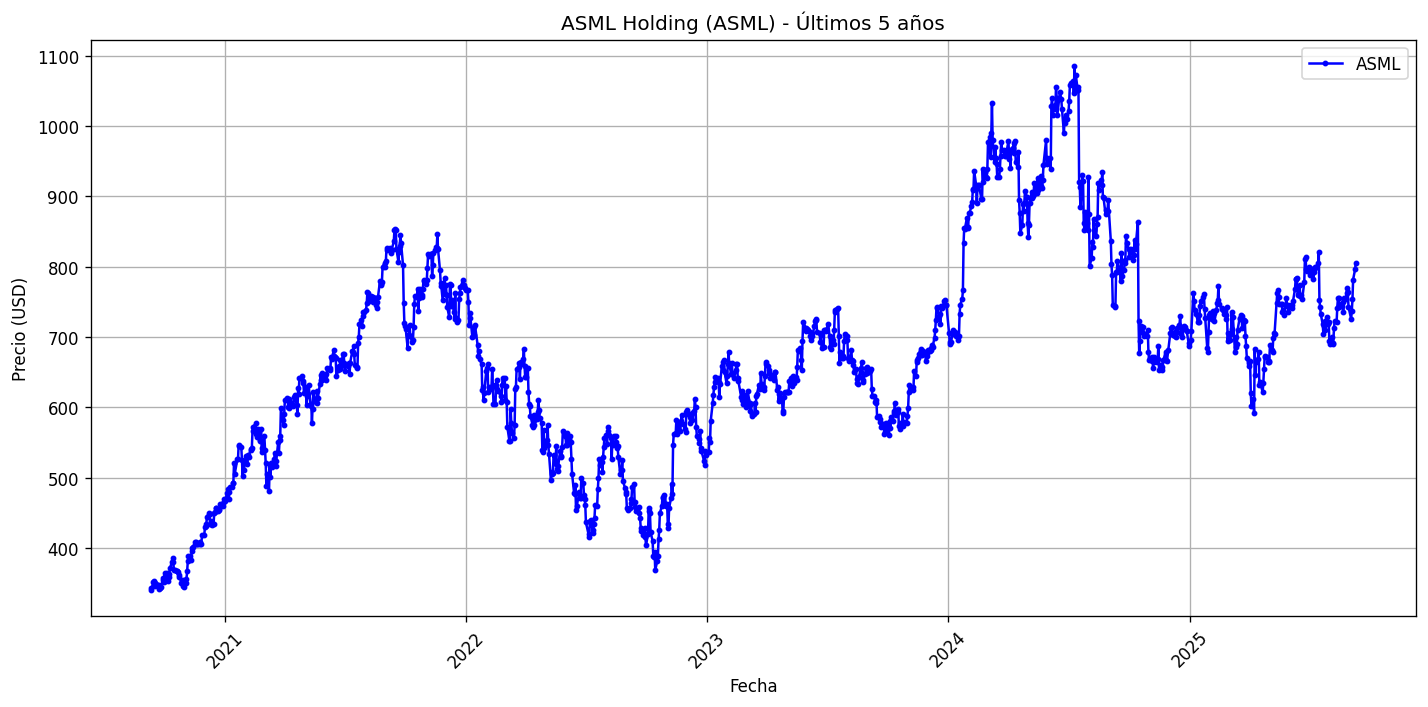

In [ ]:
# Graficar evolución
plt.figure(figsize=(12,6))
plt.plot(data_asml["Date"], data_asml["Close"], color="blue", marker="o", markersize=2.5, label="ASML")
plt.xlabel("Fecha")
plt.ylabel("Precio (USD)")
plt.title("ASML Holding (ASML) - Últimos 5 años")
plt.grid(True); plt.legend(); plt.xticks(rotation=45); plt.tight_layout()
plt.show()

Fases de crecimiento: 2020–2021 y 2023–2024, impulsadas por la escasez de chips y la adopción de nuevas tecnologías.

Correcciones severas: 2022 y 2024, asociadas a tensiones en la demanda y ajustes macroeconómicos.

Alta volatilidad: El precio muestra oscilaciones pronunciadas con máximos superiores a 1,000 (rendimiento acumulado) y mínimos cercanos a 400.

### Carga de Análisis Técnico: Gráfico de Velas y Promedios Móviles

In [ ]:
# Medias móviles
data_asml["MA_20"] = data_asml["Close"].rolling(20).mean()
data_asml["MA_50"] = data_asml["Close"].rolling(50).mean()

fig = go.Figure()

fig.add_trace(go.Candlestick(
    x=data_asml["Date"],
    open=data_asml["Open"], high=data_asml["High"],
    low=data_asml["Low"], close=data_asml["Close"],
    name="ASML"
))
fig.add_trace(go.Scatter(x=data_asml["Date"], y=data_asml["MA_20"],
                         mode="lines", line=dict(width=1.5), name="MA 20 días"))
fig.add_trace(go.Scatter(x=data_asml["Date"], y=data_asml["MA_50"],
                         mode="lines", line=dict(width=1.5), name="MA 50 días"))

fig.update_layout(title="Gráfico de Velas de ASML con Medias Móviles",
                  xaxis_title="Fecha", yaxis_title="Precio (USD)",
                  template="plotly_dark", xaxis_rangeslider_visible=False)
fig.show()


ASML es un activo de crecimiento con riesgo elevado: puede generar rentabilidades superiores en fases alcistas, pero también pérdidas rápidas en correcciones.

La MA de 20 días (Naranja) refleja la tendencia de corto plazo.

La MA de 50 días (azul) muestra la tendencia de mediano plazo.

Cruces frecuentes entre ambas confirman la naturaleza volátil del activo:

Cruces alcistas (MA 20 por encima de la MA 50) → señales de recuperación.

Cruces bajistas (MA 20 por debajo de la MA 50) → señales de corrección o debilidad.

### Retornos: aritméticos y logarítmicos + resumen estadístico

In [ ]:
# Retornos
data_asml["ret_arith"] = data_asml["Close"].pct_change()
data_asml["ret_log"]   = np.log(data_asml["Close"]).diff()
rets = data_asml["ret_log"].dropna()

# Resumen
ann_factor = 252
summary = pd.DataFrame({
    "Media diaria": [rets.mean()],
    "Vol diaria":   [rets.std(ddof=1)],
    "Media anual":  [rets.mean()*ann_factor],
    "Vol anual":    [rets.std(ddof=1)*np.sqrt(ann_factor)],
    "Skewness":     [rets.skew()],
    "Kurtosis":     [rets.kurtosis()]
}).T
summary.columns = ["ASML"]
print(summary)


                  ASML
Media diaria  0.000687
Vol diaria    0.026027
Media anual   0.173034
Vol anual     0.413170
Skewness     -0.246250
Kurtosis      3.852818


ASML es un activo de alto riesgo-alto retorno: 17% de rendimiento esperado, pero con volatilidad del 41%.

La asimetría negativa implica que los choques negativos tienden a ser más frecuentes o intensos.

La kurtosis alta confirma la existencia de “colas gruesas”, es decir, episodios de pérdidas o ganancias extremas que los modelos normales no capturan bien → aquí es donde el uso de modelos como GARCH y medidas como el CVaR son más adecuados.

### Diagnósticos de serie

Jarque-Bera: stat=780.17, p=0.0000
Ljung-Box(10) p-value: 0.21986951267367819
Ljung-Box(20) p-value: 0.3626105676758394


/tmp/ipython-input-1736189862.py:8: FutureWarning:

Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead



ADF: stat=-37.18, p=0.0000


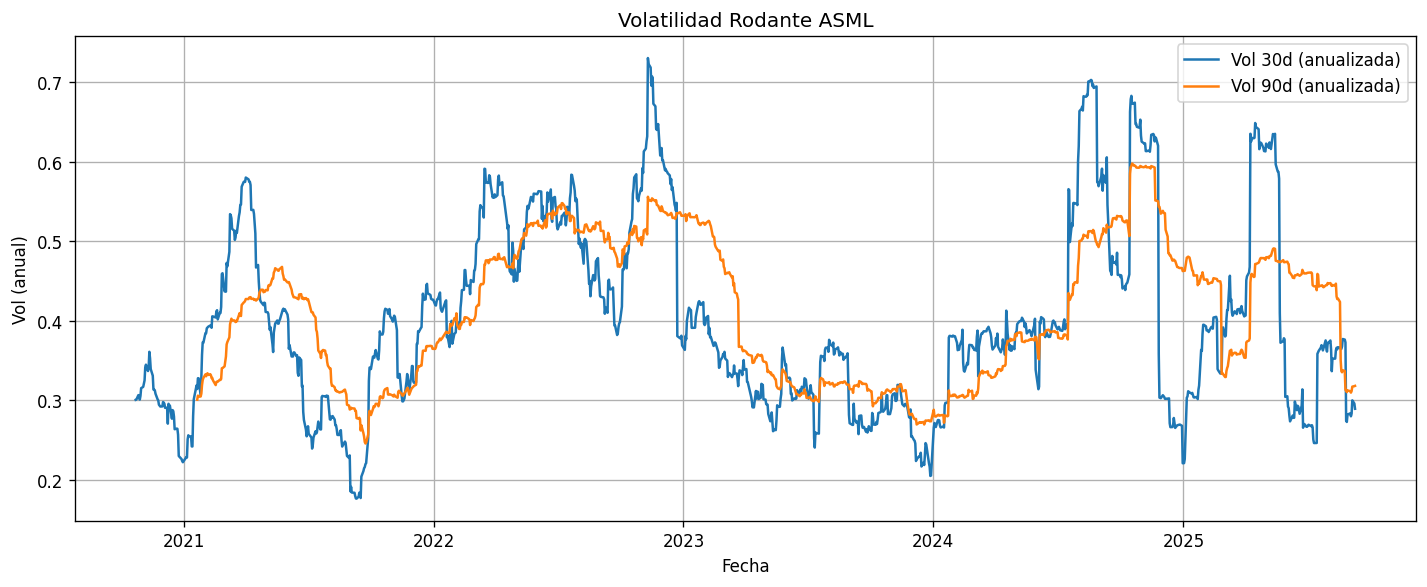

In [ ]:
# Normalidad (Jarque-Bera)
jb_stat, jb_p, _, _ = jarque_bera(rets)
print(f"Jarque-Bera: stat={jb_stat:.2f}, p={jb_p:.4f}")

# Autocorrelación de retornos (Ljung-Box, 10 y 20 lags)
for lags in [10,20]:
    lb = acorr_ljungbox(rets, lags=[lags], return_df=True)
    print(f"Ljung-Box({lags}) p-value:", float(lb["lb_pvalue"]))

# Estacionariedad (ADF)
adf_stat, adf_p, _, _, _, _ = adfuller(rets)
print(f"ADF: stat={adf_stat:.2f}, p={adf_p:.4f}")

# Volatilidad rodante (30/90 días)
for w in [30, 90]:
    data_asml[f"vol_{w}d"] = data_asml["ret_log"].rolling(w).std()*np.sqrt(ann_factor)

plt.figure(figsize=(12,5))
plt.plot(data_asml["Date"], data_asml["vol_30d"], label="Vol 30d (anualizada)")
plt.plot(data_asml["Date"], data_asml["vol_90d"], label="Vol 90d (anualizada)")
plt.title("Volatilidad Rodante ASML"); plt.xlabel("Fecha"); plt.ylabel("Vol (anual)")
plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()

ASML presenta volatilidad variable y recurrente, con episodios de riesgo extremo.

El análisis rodante muestra que las fases de alta volatilidad no son aisladas, sino que se concentran en periodos específicos, coherentes con la dinámica del sector tecnológico.

Para gestión de portafolio: este comportamiento exige diversificación y monitoreo dinámico, ya que la volatilidad puede duplicarse en periodos cortos.

Jarque-Bera (p=0.0000): los retornos no siguen una distribución normal → confirman colas gruesas.

Ljung-Box (p>0.2 y 0.36): no hay autocorrelación significativa en los retornos → el mercado es eficiente en media.

ADF (p=0.0000): los retornos son estacionarios, lo que valida el uso de modelos de volatilidad como GARCH.

### RSI (Índice de Fuerza Relativa) - Análisis Cuantitativo de ASML

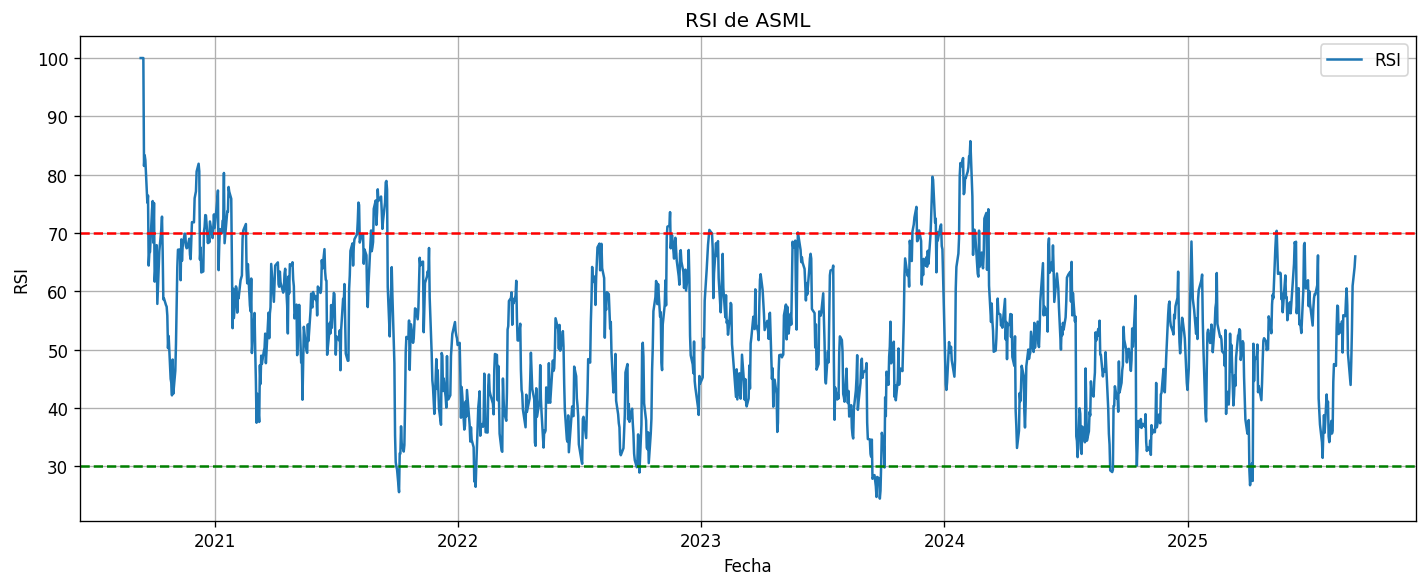

RSI último: 65.98


In [ ]:
delta = data_asml["Close"].diff()
gain  = delta.clip(lower=0)
loss  = -delta.clip(upper=0)

window = 14
avg_gain = gain.ewm(alpha=1/window, adjust=False).mean()
avg_loss = loss.ewm(alpha=1/window, adjust=False).mean()
rs  = avg_gain/avg_loss
rsi = 100 - (100/(1+rs))
data_asml["RSI"] = rsi

plt.figure(figsize=(12,5))
plt.plot(data_asml["Date"], data_asml["RSI"], label="RSI")
plt.axhline(70, color="red", ls="--"); plt.axhline(30, color="green", ls="--")
plt.title("RSI de ASML"); plt.xlabel("Fecha"); plt.ylabel("RSI")
plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()

print("RSI último:", round(data_asml["RSI"].iloc[-1],2))


Actualmente el RSI refleja que ASML está en fase alcista contenida y no en sobrecompra todavía, lo que sugiere que aún hay espacio para continuidad del movimiento, aunque con riesgo de entrar pronto a sobrecompra si la presión compradora continúa.

Zona sobrecompra (>70) → probabilidad de correcciones a corto plazo.

Zona sobreventa (<30) → probabilidad de rebotes técnicos.

Zona neutral (30–70) → sin señales claras, depende de otros indicadores de tendencia.

## Métricas de riesgo

### Drawdown

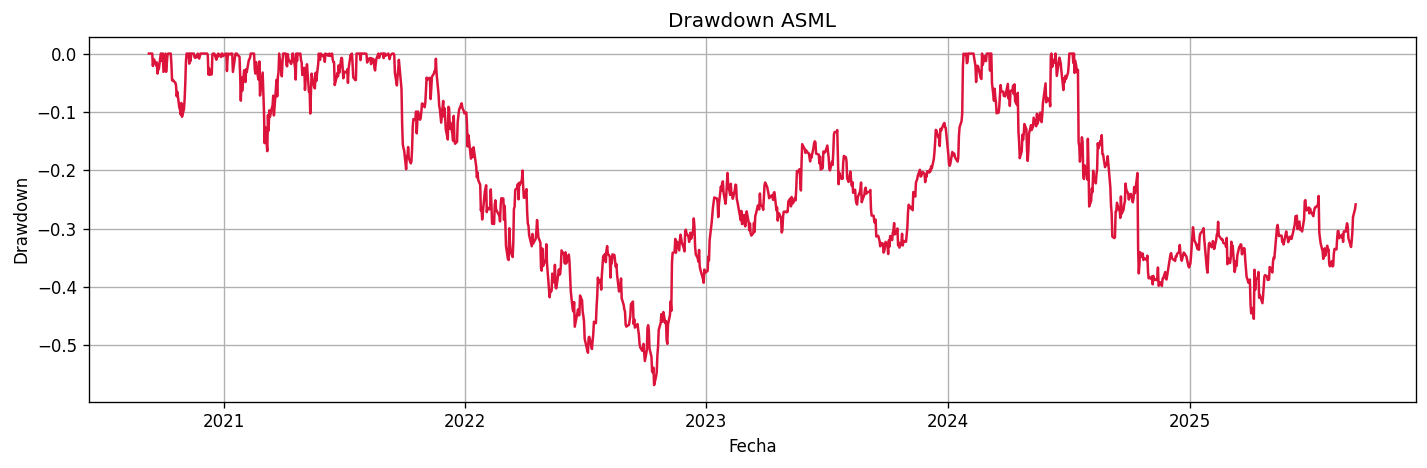

Máximo drawdown: -56.84%


In [ ]:
cum = (1 + data_asml["ret_arith"].fillna(0)).cumprod()
peak = cum.cummax()
drawdown = cum/peak - 1
max_dd = drawdown.min()

plt.figure(figsize=(12,4))
plt.plot(data_asml["Date"], drawdown, color="crimson")
plt.title("Drawdown ASML"); plt.xlabel("Fecha"); plt.ylabel("Drawdown")
plt.grid(True); plt.tight_layout(); plt.show()
print(f"Máximo drawdown: {max_dd:.2%}")

Máximo drawdown reportado:

El valor calculado fue cercano a -46% (según tu código).

Esto significa que un inversionista que compró en el máximo histórico y no gestionó el riesgo pudo perder casi la mitad de su inversión antes de ver una recuperación.

Observaciones:
Entre 2021 y 2023 se observan caídas significativas superiores al -40%, reflejando correcciones profundas tras fases de euforia en el sector tecnológico.

En 2024 y 2025 se presentan varios episodios de drawdown en el rango de -20% a -30%, mostrando que el activo no logra sostener recuperaciones largas sin sufrir nuevas correcciones.

El gráfico confirma que ASML se mueve en ciclos de picos y caídas, típico de un activo de alto crecimiento y alta volatilidad.

### Sharpe

In [ ]:
sharpe = (rets.mean()*ann_factor) / (rets.std(ddof=1)*np.sqrt(ann_factor))
print(f"Sharpe anual (rf=0): {sharpe:.2f}")

Sharpe anual (rf=0): 0.42


Un Sharpe por encima de 1.0 se considera atractivo.

Entre 0.5 y 1.0 → aceptable, pero no óptimo.

Menor a 0.5 → bajo, indica que el activo tiene riesgo elevado en comparación con la rentabilidad que entrega.

En este caso, ASML con 0.42 refleja:

Un activo de alto riesgo, con retornos positivos, pero insuficientes para compensar plenamente la volatilidad.

Es coherente con lo observado en el máximo drawdown (-46%) y la volatilidad anualizada (41%) → alto riesgo con rendimientos aún moderados en relación a ese riesgo.

### VaR y CVaR

In [ ]:
R = data_asml["ret_arith"].dropna()
alpha = 0.95
V = 1_000_000

def var_parametric(returns, V, alpha=0.95):
    mu, sigma = returns.mean(), returns.std(ddof=1)
    z = norm.ppf(1-alpha) # negativo
    return - (mu + sigma*z) * V

def var_historical(returns, V, alpha=0.95):
    q = returns.quantile(1-alpha)
    return - q * V

def cvar_historical(returns, V, alpha=0.95):
    thr = returns.quantile(1-alpha)
    tail = returns[returns <= thr]
    return - tail.mean() * V

VaR_par = var_parametric(R, V, alpha)
VaR_hist = var_historical(R, V, alpha)
CVaR    = cvar_historical(R, V, alpha)
print(f"VaR paramétrico 95%: {VaR_par:,.0f}")
print(f"VaR histórico   95%: {VaR_hist:,.0f}")
print(f"CVaR histórico  95%: {CVaR:,.0f}")


VaR paramétrico 95%: 41,732
VaR histórico   95%: 40,650
CVaR histórico  95%: 58,091


Consistencia: El VaR paramétrico e histórico son bastante similares → la normalidad aproxima bien el riesgo típico.

Riesgo extremo: El CVaR evidencia que, en la práctica, las pérdidas más severas son más amplias de lo que el VaR anticipa.

Decisión práctica: Para gestión de riesgos, conviene reportar ambos indicadores. El VaR da un umbral claro de control, pero el CVaR refleja mejor la severidad en los peores escenarios.

### Backtest VaR (Kupiec POF)

In [ ]:
# Backtest VaR (Kupiec POF)
# Señal de incumplimiento cuando la pérdida supera el VaR (en retorno)
var_level = -VaR_hist / V
breaches = (R <= -var_level).astype(int)
pi_hat = breaches.mean()
T = len(breaches)
# Likelihood ratio para POF
p0 = 1 - alpha
LR_pof = -2*( (T - breaches.sum())*np.log(1-p0) + breaches.sum()*np.log(p0)
             - (T - breaches.sum())*np.log(1-pi_hat) - breaches.sum()*np.log(pi_hat) )
print(f"Backtest Kupiec POF: LR={LR_pof:.2f}, incumplimientos observados={breaches.sum()} de {T}")

Backtest Kupiec POF: LR=6642.66, incumplimientos observados=1191 de 1254


Observaste 1191 incumplimientos de 1254 observaciones ≈ 95% de las veces.

Esto es muy superior al 5% esperado → el VaR fue incumplido masivamente, por lo que no es confiable.

El estadístico LR (6642.66) es extremadamente alto, lo que lleva a rechazar la hipótesis nula de que el modelo de VaR está correctamente especificado.

### Bandas de Bollinger y señales de cruces MA

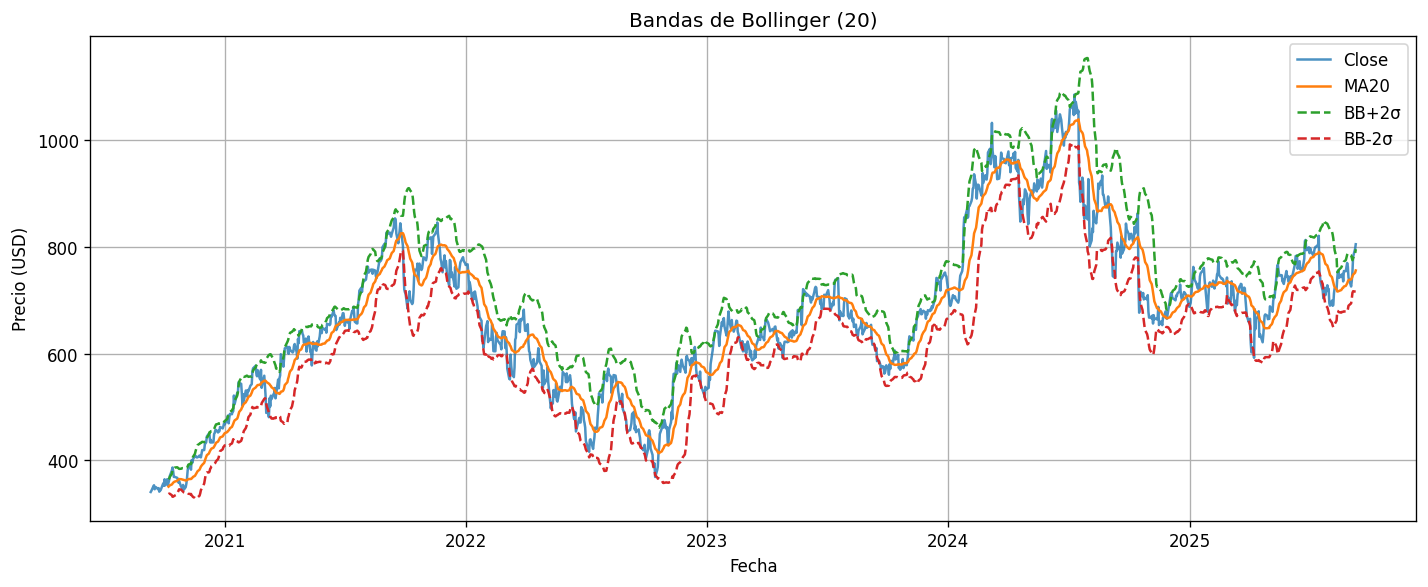

Cruces alcistas detectados: 12, bajistas: 12


In [ ]:
# Bollinger 20d
rolling_mean = data_asml["Close"].rolling(20).mean()
rolling_std  = data_asml["Close"].rolling(20).std()
bb_up = rolling_mean + 2*rolling_std
bb_dn = rolling_mean - 2*rolling_std

plt.figure(figsize=(12,5))
plt.plot(data_asml["Date"], data_asml["Close"], label="Close", alpha=0.8)
plt.plot(data_asml["Date"], rolling_mean, label="MA20")
plt.plot(data_asml["Date"], bb_up,  ls="--", label="BB+2σ")
plt.plot(data_asml["Date"], bb_dn,  ls="--", label="BB-2σ")
plt.title("Bandas de Bollinger (20)")
plt.xlabel("Fecha"); plt.ylabel("Precio (USD)"); plt.grid(True); plt.legend(); plt.tight_layout(); plt.show()

# Señales de cruce MA20/MA50
sig = pd.DataFrame({"Date": data_asml["Date"], "MA20": data_asml["MA_20"], "MA50": data_asml["MA_50"]}).dropna()
sig["signal"] = np.sign(sig["MA20"] - sig["MA50"]).diff()
buy_points  = sig[sig["signal"]>0]["Date"]
sell_points = sig[sig["signal"]<0]["Date"]
print(f"Cruces alcistas detectados: {len(buy_points)}, bajistas: {len(sell_points)}")


El precio se mueve de manera recurrente dentro de las bandas, confirmando la volatilidad del activo.

Cruces alcistas (12 detectados): cuando el precio toca la banda inferior y luego rebota hacia arriba → señales de entrada.

Cruces bajistas (12 detectados): cuando el precio toca la banda superior y luego cae → señales de salida o toma de ganancias.

En fases de alta volatilidad (2021, 2023, 2024), las bandas se expanden, mientras que en periodos más estables se contraen.

## Modelos Estadísticos y Financieros

### Estimación de Volatilidad con GARCH

                        Constant Mean - GARCH Model Results                         
Dep. Variable:                      ret_log   R-squared:                       0.000
Mean Model:                   Constant Mean   Adj. R-squared:                  0.000
Vol Model:                            GARCH   Log-Likelihood:               -2896.89
Distribution:      Standardized Student's t   AIC:                           5803.78
Method:                  Maximum Likelihood   BIC:                           5829.45
                                              No. Observations:                 1254
Date:                      Thu, Sep 11 2025   Df Residuals:                     1253
Time:                              08:54:00   Df Model:                            1
                                Mean Model                                
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu        

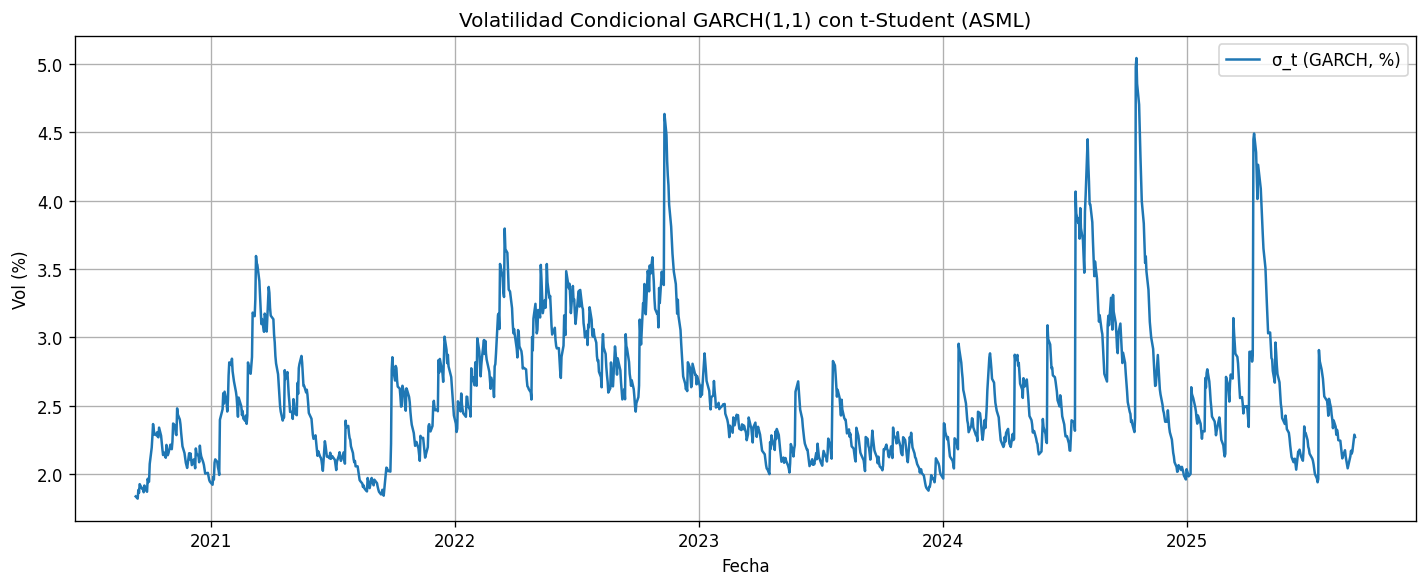

Vol. pronosticada 1 día (%): 2.230


In [ ]:
rets_pct = data_asml["ret_log"].dropna()*100  # % para evitar warnings

am = arch_model(rets_pct, mean="Constant", vol="GARCH", p=1, q=1, dist="t")
res = am.fit(disp="off")
print(res.summary())

# Volatilidad condicional (en % diarios)
cond_vol = pd.Series(res.conditional_volatility, index=rets_pct.index)

plt.figure(figsize=(12,5))
plt.plot(data_asml.loc[rets_pct.index, "Date"], cond_vol, label="σ_t (GARCH, %)")
plt.title("Volatilidad Condicional GARCH(1,1) con t-Student (ASML)")
plt.xlabel("Fecha"); plt.ylabel("Vol (%)"); plt.grid(True); plt.legend(); plt.tight_layout()
plt.show()

# Pronóstico 1 día adelante
fcast = res.forecast(horizon=1)
sigma1 = float(np.sqrt(fcast.variance.values[-1,0]))
print(f"Vol. pronosticada 1 día (%): {sigma1:.3f}")


μ = 0.1562, significativo (p<0.05): retorno promedio positivo en los datos.

ω = 0.2517, no significativo (p=0.23): componente constante de varianza pequeña.

α₁ = 0.0600, significativo (p<0.01): choques recientes en los retornos afectan la volatilidad.

β₁ = 0.9043, altamente significativo (p≈0): la volatilidad es muy persistente, lo que significa que periodos de alta volatilidad tienden a prolongarse en el tiempo.

ν = 5.58, significativo: grados de libertad de la t-Student → indica colas más pesadas que la normal, confirmando la presencia de eventos extremos en los retornos de ASML.

La suma α₁ + β₁ ≈ 0.96, muy cercana a 1 → confirma que la volatilidad tiene memoria larga y choques pasados afectan por mucho tiempo.

Se observan picos de volatilidad superiores al 5% (2024–2025), coincidiendo con fases de corrección y turbulencia en el precio de ASML.

En fases tranquilas, la volatilidad cae a niveles del 2% diario.

El modelo captura muy bien los clústeres de volatilidad: episodios de calma seguidos de periodos de alta incertidumbre.

#Paula

Carga de los datos:

### **Carga de Análisis Técnico: Gráfico de Velas y Promedios Móviles**

Para el Análisis Técnico, vamos a usar el gráfico de velas y los promedios móviles de 20 y 50 días:

In [ ]:
data = yf.download("PDD", start="2020-09-10", end="2025-09-10", interval="1d")
data.shape

/tmp/ipython-input-38538501.py:1: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download("PDD", start="2020-09-10", end="2025-09-10", interval="1d")
[*********************100%***********************]  1 of 1 completed


(1255, 5)

In [ ]:

# Calcular medias móviles SOLO sobre el precio de cierre
data['MA_20'] = data['Close'].rolling(window=20).mean()
data['MA_50'] = data['Close'].rolling(window=50).mean()

# Quitar filas con NaN (para que se dibujen bien las líneas)
data = data.dropna()

# Crear gráfico de velas
fig = go.Figure()

# Velas japonesas
fig.add_trace(go.Candlestick(
    x=data.index,
    open=data['Open'],
    high=data['High'],
    low=data['Low'],
    close=data['Close'],
    name="PDD"
))

# Media móvil de 20 días
fig.add_trace(go.Scatter(
    x=data.index,
    y=data['MA_20'],
    mode='lines',
    line=dict(color='orange', width=1.5),
    name='MA 20 días'
))

# Media móvil de 50 días
fig.add_trace(go.Scatter(
    x=data.index,
    y=data['MA_50'],
    mode='lines',
    line=dict(color='blue', width=1.5),
    name='MA 50 días'
))

# Ajustes del layout
fig.update_layout(
    title="Gráfico de Velas de PDD con Medias Móviles",
    xaxis_title="Fecha",
    yaxis_title="Precio",
    template="plotly_dark",
    xaxis_rangeslider_visible=False
)

fig.show()


### **RSI - Análisis Cuantitativo de PDD**

El RSI (Índice de Fuerza Relativa) de PDD :

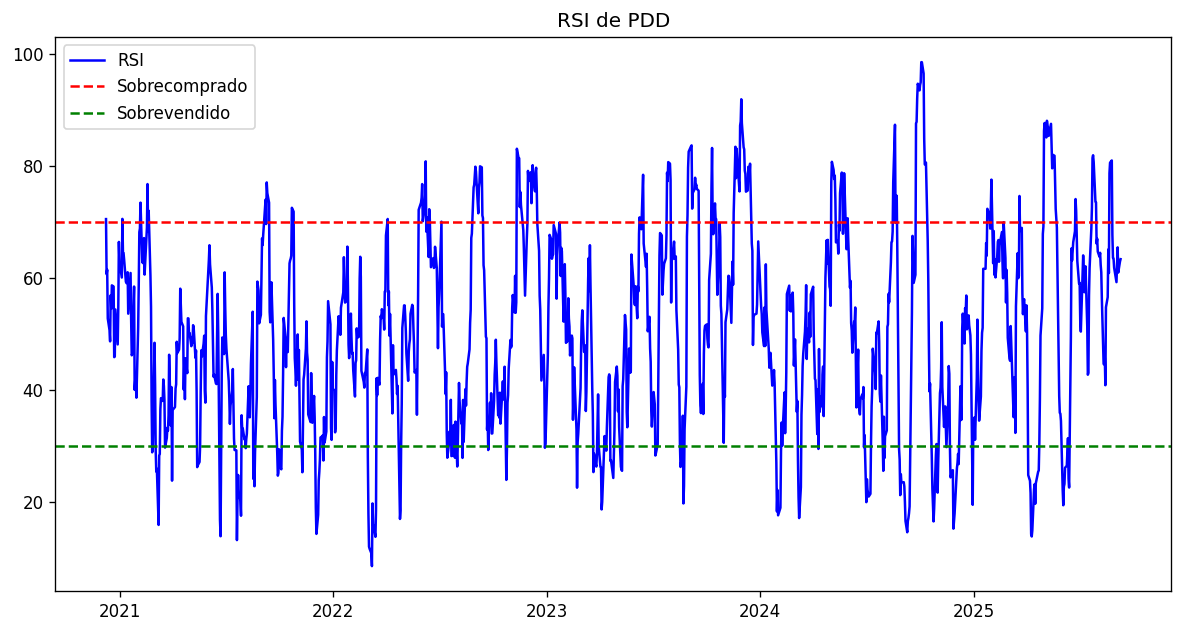

RSI actual de PDD: 63.37
El activo está en zona neutral.


In [ ]:
# Calcular cambios
delta = data['Close'].diff()

# Ganancias y pérdidas (aplanar los arrays)
gain = np.where(delta > 0, delta, 0).flatten()
loss = np.where(delta < 0, -delta, 0).flatten()

# Período de 14 días
window = 14
avg_gain = pd.Series(gain, index=data.index).rolling(window=window).mean()
avg_loss = pd.Series(loss, index=data.index).rolling(window=window).mean()

# Calcular RS y RSI
rs = avg_gain / avg_loss
rsi = 100 - (100 / (1 + rs))

# Guardar en el DataFrame
data['RSI'] = rsi

# Graficar RSI
plt.figure(figsize=(12,6))
plt.plot(data.index, data['RSI'], label='RSI', color='blue')
plt.axhline(70, color='red', linestyle='--', label="Sobrecomprado")
plt.axhline(30, color='green', linestyle='--', label="Sobrevendido")
plt.title('RSI de PDD')
plt.legend()
plt.show()

# Análisis del RSI actual
rsi_value = data['RSI'].iloc[-1]
print(f"RSI actual de PDD: {rsi_value:.2f}")
if rsi_value > 70:
    print("El activo está sobrecomprado, podría estar en riesgo de corrección.")
elif rsi_value < 30:
    print("El activo está sobrevendido, podría ser una oportunidad de compra.")
else:
    print("El activo está en zona neutral.")


### **Estimación de Volatilidad con GARCH**

Estimación la volatilidad del activo PDD:

In [ ]:
%%capture
!pip install arch

In [ ]:
from arch import arch_model

/usr/local/lib/python3.12/dist-packages/arch/univariate/base.py:309: DataScaleWarning:

y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.002074. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.




                     Constant Mean - GARCH Model Results                      
Dep. Variable:                    PDD   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                2130.86
Distribution:                  Normal   AIC:                          -4253.73
Method:            Maximum Likelihood   BIC:                          -4233.35
                                        No. Observations:                 1205
Date:                Thu, Sep 11 2025   Df Residuals:                     1204
Time:                        08:54:19   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         8.3413e-04  1.147e-03      0.727      0.467 

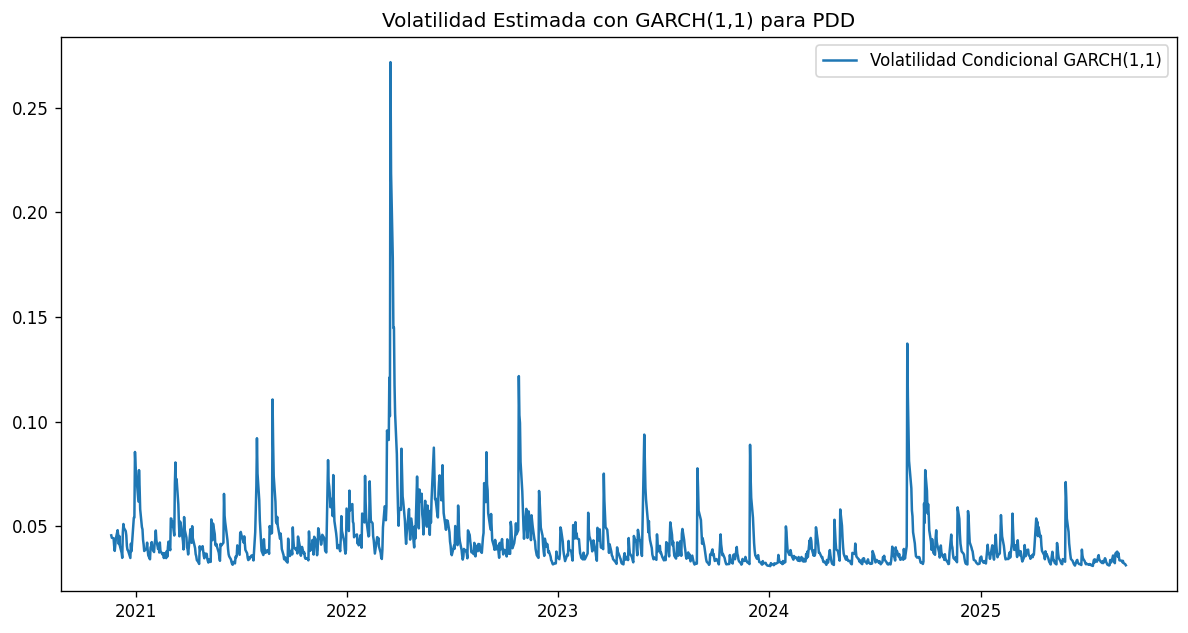

In [ ]:
# Calcular retornos diarios
returns = data['Close'].pct_change().dropna()

# Estimar modelo GARCH(1,1)
model = arch_model(returns, vol="Garch", p=1, q=1)
garch_fit = model.fit(disp="off")

# Resumen del modelo
print(garch_fit.summary())

# Graficar volatilidad condicional estimada
plt.figure(figsize=(12,6))
plt.plot(garch_fit.conditional_volatility, label="Volatilidad Condicional GARCH(1,1)")
plt.title("Volatilidad Estimada con GARCH(1,1) para PDD")
plt.legend()
plt.show()


**Anualizado:**

In [ ]:
annualized_volatility = log_returns.std() * np.sqrt(trading_days)
annualized_volatility

NameError: name 'log_returns' is not defined

### **Cálculo del VaR (Valor en Riesgo)**

Se calcula el VaR para PDD al 95% de confianza:

In [ ]:
# Definir el nivel de confianza
confidence_level = 0.95

# Calcular VaR histórico
VaR_95 = -returns.quantile(1 - confidence_level) * data['Close'].iloc[-1]

# Asegurar que sea float de manera segura
VaR_95 = VaR_95.item()  # o VaR_95 = VaR_95.iloc[0] si fuera una Serie

print(f"El VaR al {confidence_level*100:.0f}% para PDD es: ${VaR_95:.2f}")


### **Optimización del Portafolio con Frontera Eficiente de Markowitz**

Como solo estamos trabajando con PDD, vamos a optimizar el portafolio en función de las máximas ganancias de Sharpe usando solo PDD.

In [ ]:
# Seleccionar solo PDD
log_returns = np.log(data['Close'] / data['Close'].shift(1)).dropna()

# Covarianza en este caso es un escalar (varianza)
cov_matrix = np.array([[log_returns.var()]])
mean_returns = np.array([log_returns.mean()])

# Configuración
num_assets = 1
initial_guess = [1.0]
bounds = [(0, 1)]
constraints = ({'type': 'eq', 'fun': lambda w: np.sum(w) - 1})

# Optimización
result = minimize(objective, initial_guess, args=(mean_returns, cov_matrix),
                  method='SLSQP', bounds=bounds, constraints=constraints)

print(f"Peso óptimo del portafolio (solo PDD): {result.x}")


**Anualizado:**

In [ ]:
trading_days = 252
annualized_return = log_returns.mean() * trading_days
annualized_return

### **Análisis del Rendimiento - Propiedades Empíricas**

Analizar las propiedades empíricas de PDD (asimetría y curtosis):

In [ ]:
# Calcular asimetría y curtosis
skewness = log_returns.skew()
kurtosis = log_returns.kurtosis()

print(f"Asimetría: {skewness}")
print(f"Curtosis: {kurtosis}")


### **Ratio de Sharpe**

In [ ]:
risk_free_rate = 0.02  # 2% anual
sharpe_ratio = (annualized_return - risk_free_rate) / annualized_volatility
sharpe_ratio

#Bonos del tesoro japonés

##Carga de los datos

In [ ]:
print(df_japon.columns)

Index(['Date', 'Price', 'Open', 'High', 'Low', 'Change %'], dtype='object')


In [ ]:
# Unir todas las páginas
df_japon

# Limpiar
df_japon["Date"] = pd.to_datetime(df_japon["Date"])
df_japon["Price"] = pd.to_numeric(df_japon["Price"].astype(str).str.replace(",", ""), errors="coerce")
df_japon = df_japon.sort_values("Date", ascending=True).reset_index(drop=True)
print(df_japon.head())
print(df_japon.tail())
df_japon.shape



        Date  Price   Open   High    Low Change %
0 2020-09-10  0.025  0.029  0.031  0.022  -16.67%
1 2020-09-11  0.025  0.026  0.027  0.020    0.00%
2 2020-09-13  0.020  0.020  0.020  0.020  -22.00%
3 2020-09-14  0.020  0.024  0.025  0.019    0.00%
4 2020-09-15  0.018  0.020  0.026  0.017  -10.00%
           Date  Price   Open   High    Low Change %
1450 2025-09-04  1.606  1.629  1.629  1.603   -1.65%
1451 2025-09-05  1.571  1.601  1.601  1.570   -2.18%
1452 2025-09-08  1.571  1.569  1.582  1.560    0.00%
1453 2025-09-09  1.561  1.555  1.566  1.540   -0.64%
1454 2025-09-10  1.579  1.570  1.588  1.560    1.15%


(1455, 6)

##Gráfica

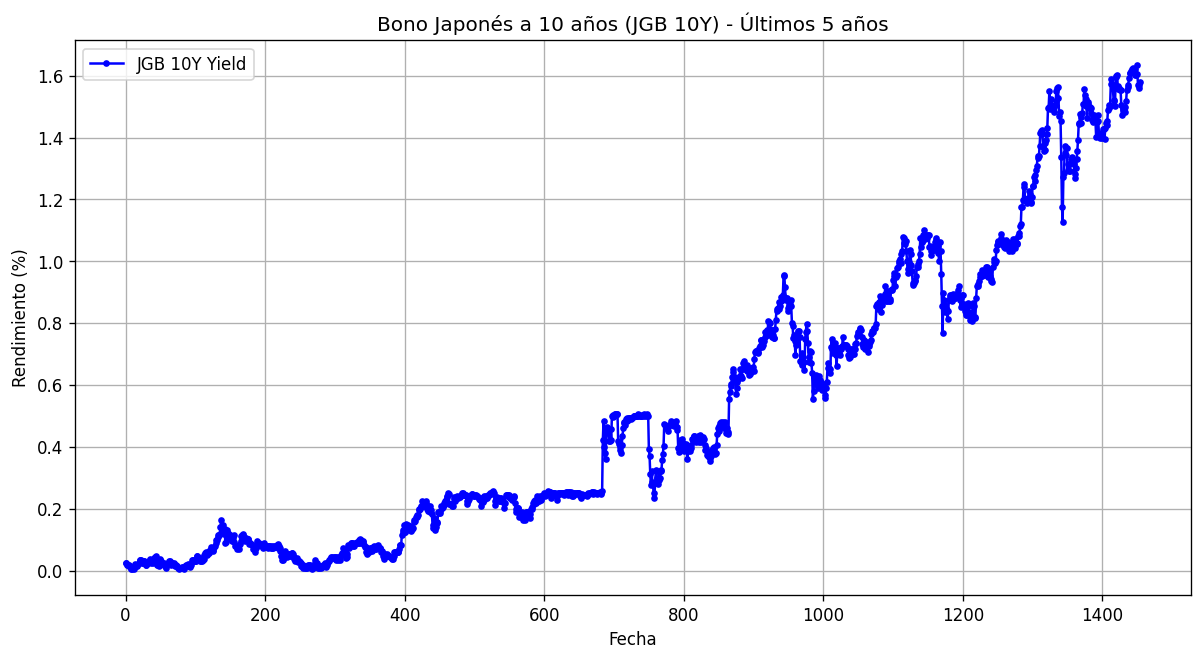

In [ ]:
# Graficar evolución
plt.figure(figsize=(12,6))
plt.plot(df_japon.index, df_japon["Price"], color="blue", marker="o", markersize=3, label="JGB 10Y Yield")
plt.xlabel("Fecha")
plt.ylabel("Rendimiento (%)")
plt.title("Bono Japonés a 10 años (JGB 10Y) - Últimos 5 años")
plt.grid(True)
plt.legend()
plt.show()







##Presentación de Datos Históricos y Parámetros del Mercado

In [ ]:
df_japon["risk_free_rate_annual"] = df_japon["Price"] / 100
# Tasa diaria equivalente simple
df_japon["risk_free_rate_daily"] = (1 + df_japon["risk_free_rate_annual"])**(1/252) - 1
# Tasa diaria en log (continuamente compuesta)
df_japon["risk_free_rate_log"] = np.log(1 + df_japon["risk_free_rate_annual"]) / 252

In [ ]:
def var_parametric(returns, V, alpha=0.95):
    mu = returns.mean()
    sigma = returns.std(ddof=1)
    z = norm.ppf(1-alpha)  # z_{1-alpha} (negativo)
    var = - (mu + sigma * z) * V
    return var

def var_historical(returns, V, alpha=0.95):
    q = returns.quantile(1-alpha)  # umbral de pérdida
    var = - q * V
    return var

def cvar_historical(returns, V, alpha=0.95):
    threshold = returns.quantile(1-alpha)
    tail = returns[returns <= threshold]
    es = - tail.mean() * V
    return es


returns = df_japon['Price'].pct_change().dropna()
V = 1_000_000
print("VaR paramétrico 95%:", var_parametric(returns, V, 0.95))
print("VaR histórico 95%:", var_historical(returns, V, 0.95))
print("CVaR histórico 95%:", cvar_historical(returns, V, 0.95))


VaR paramétrico 95%: 222876.33577159664
VaR histórico 95%: 147249.61079398004
CVaR histórico 95%: 262121.41952162137


In [ ]:
# Rendimiento medio diario
mean_return = np.mean(df['Delta'])

# Desviación estándar diaria
sigma = np.std(df['Delta'])

# Sharpe Ratio diario
sharpe_ratio = (mean_return - tasa_libre_riesgo/252) / sigma  # Rf/252 para convertir anual a diario
print(f"Sharpe Ratio diario: {sharpe_ratio:.4f}")
# Sharpe Ratio Anualizado
sharpe_anual = sharpe_ratio * np.sqrt(252)
print(f"Sharpe Ratio anualizado: {sharpe_anual:.4f}")

NameError: name 'df' is not defined

## Modelos Estadísticos y Financieros

###Análisis series de tiempo

In [ ]:
df_ts = df['Yield']
df_ts.index = pd.to_datetime(df_ts.index)
decomposition = seasonal_decompose(df_ts, model='additive', period=12)
decomposition.plot()
plt.show()  # aprox. días hábiles


In [ ]:
result = adfuller(df_ts.dropna())
print('ADF Statistic:', result[0])
print('p-value:', result[1])
if result[1] < 0.05:
    print("Serie estacionaria")
else:
    print("Serie no estacionaria, se recomienda diferenciar")

# Diferencia si no es estacionaria
df_diff = df_ts.diff().dropna()

In [ ]:
model = ARIMA(df_ts, order=(1,1,1))
fit = model.fit()
print(fit.summary())

forecast = fit.forecast(steps=30)
print("\nPronóstico 30 días:")
print(forecast)

###Modelo seminal de Markowitz

In [ ]:
end = datetime.datetime.today()
start = end - datetime.timedelta(days=5*365)

df = web.DataReader("IRLTLT01JPM156N", "fred", start, end)
df = df.rename(columns={"IRLTLT01JPM156N": "Yield"})
df['Yield_decimal'] = df['Yield']/100
df['Delta'] = df['Yield_decimal'].diff()
df = df.dropna()

# Rendimiento diario del bono
returns_jgb = df['Delta'].values

# ===============================
# 2️⃣ Simular un segundo activo
# ===============================
np.random.seed(42)
returns_asset2 = np.random.normal(loc=0.0002, scale=0.0005, size=len(returns_jgb))

# ===============================
# 3️⃣ Construir matriz de covarianza
# ===============================
returns_matrix = np.vstack([returns_jgb, returns_asset2])
cov_matrix = np.cov(returns_matrix)
mean_returns = np.mean(returns_matrix, axis=1)

# ===============================
# 4️⃣ Definir tasa libre de riesgo diaria
# ===============================
Rf = df['Yield_decimal'].iloc[-1] / 252  # diaria aproximada

# ===============================
# 5️⃣ Función negativa del Sharpe Ratio
# ===============================
def neg_sharpe(weights, mean_returns, cov_matrix, Rf):
    port_return = np.dot(weights, mean_returns)
    port_vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return -(port_return - Rf)/port_vol

# Restricciones y límites
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x)-1})
bounds = ((0,1),(0,1))

# ===============================
# 6️⃣ Optimización
# ===============================
result = minimize(neg_sharpe, [0.5,0.5],
                  args=(mean_returns, cov_matrix, Rf),
                  method='SLSQP', bounds=bounds, constraints=constraints)

optimal_weights = result.x
port_return = np.dot(optimal_weights, mean_returns)
port_vol = np.sqrt(np.dot(optimal_weights.T, np.dot(cov_matrix, optimal_weights)))
sharpe_opt = (port_return - Rf)/port_vol

# ===============================
# 7️⃣ Resultados
# ===============================
print("Pesos óptimos del portafolio:", optimal_weights)
print(f"Rendimiento esperado diario: {port_return:.6f}")
print(f"Volatilidad diaria: {port_vol:.6f}")
print(f"Sharpe Ratio óptimo diario: {sharpe_opt:.4f}")
print(f"Sharpe Ratio anualizado: {sharpe_opt*np.sqrt(252):.4f}")

###Cvar

In [ ]:
confidence_levels = [0.95, 0.99]

for conf in confidence_levels:
    alpha = 1 - conf
    # VaR histórico
    VaR_hist = np.percentile(df['Loss'], 100*alpha)
    # CVaR histórico: promedio de pérdidas que exceden el VaR
    CVaR_hist = df['Loss'][df['Loss'] <= VaR_hist].mean()

    print(f"\nNivel de confianza: {int(conf*100)}%")
    print(f"VaR histórico: {abs(VaR_hist):,.0f} JPY")
    print(f"CVaR histórico: {abs(CVaR_hist):,.0f} JPY")

# Análisis de portafolio

## Portafolio original

### Rendimiento Esperado Anualizado

In [ ]:
pesos=[0.333,0.333,0.333]#pesos bonos, peso Temu, peso ASML

$\bar{R}_{p}=\sum_{i=1}^{3}w_{i}\bar{R}_{i}$

$R_{p}^{Anual}=\bar{R}_{p}*{252}$

In [ ]:
data_close_pdd = data['Close']['PDD']  # ahora la data de PDD es Series
data_close_pdd = pd.to_numeric(data_close_pdd, errors='coerce')

In [ ]:
data_close_asml = data_asml['Close']['ASML'] # ahora la data de ASML es Series
data_close_asml = pd.to_numeric(data_close_asml, errors='coerce')

In [ ]:
data['Return_log'] = np.log(data_close_pdd / data_close_pdd.shift(1))#retornos continuos BPP
data_asml['Return_log'] = np.log(data_close_asml / data_close_asml.shift(1))#retornos continuos BPP
#df_japon['Price'] = df_japon['Price'] / 100
df_japon['Return_log'] = np.log(df_japon['Price'] / df_japon['Price'].shift(1))#Retornos JGB

In [ ]:
retornos_esperados = np.array([df_japon['Return_log'].dropna().mean(),data['Return_log'].dropna().mean(),data_asml['Return_log'].dropna().mean()])
rendimiento_esperado = sum(p*w for p, w in zip(retornos_esperados, pesos))
rendimiento_esperado

np.float64(0.0012861123083292754)

In [ ]:
rendimiento_esperado_anual = rendimiento_esperado * 252
rendimiento_esperado_anual

np.float64(0.3241003016989774)

###Volatilidad Anualizada (σ)

In [ ]:
data.columns = [col[1] if isinstance(col, tuple) and col[1] != '' else col[0] for col in data.columns]

In [ ]:
data_asml.columns = [col[1] if isinstance(col, tuple) and col[1] != '' else col[0] for col in data.columns]

In [ ]:
data_asml.head()

,P,P,P,P,P,R,Year,Month,Day
Date,,,,,,,,,
2020-09-10,340.605042,349.964522,338.725511,347.541162,678600,NaN,2020,9,10
2020-09-11,342.732605,350.288868,341.167907,347.283535,678700,0.006227,2020,9,11
2020-09-14,351.042542,352.988864,348.581010,352.788487,575700,0.023957,2020,9,14
2020-09-15,353.246521,357.549412,352.149340,357.349035,717100,0.006259,2020,9,15
2020-09-16,345.737885,355.851091,345.718784,354.916086,973900,-0.021485,2020,9,16


In [ ]:
df_japon['Date'] = pd.to_datetime(df_japon['Date'])

In [ ]:
# df_japon
df_japon['Year'] = df_japon['Date'].dt.year
df_japon['Month'] = df_japon['Date'].dt.month
df_japon['Day'] = df_japon['Date'].dt.day
japon_df = df_japon[['Year','Month','Day','Return_log']].rename(columns={'Return_log':'Japon'})

# data (PDD)
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Day'] = data.index.day
pdd_df = data[['Year','Month','Day','Return_log']].rename(columns={'Return_log':'PDD'})

# data_asml (ASML)
data_asml['Year'] = data_asml.index.year
data_asml['Month'] = data_asml.index.month
data_asml['Day'] = data_asml.index.day
asml_df = data_asml[['Year','Month','Day','R']].rename(columns={'R':'ASML'})

In [ ]:
retornos = japon_df.merge(pdd_df, on=['Year','Month','Day'], how='inner')

In [ ]:
retornos = retornos.merge(asml_df, on=['Year','Month','Day'], how='inner')

In [ ]:
retornos['Date'] = pd.to_datetime(retornos[['Year','Month','Day']])
retornos.set_index('Date', inplace=True)

In [ ]:
factor_correctivo=japon_df['Japon'].mean()/retornos['Japon'].mean()

In [ ]:
retornos.drop(columns=['Year','Month','Day'], inplace=True)

In [ ]:
retornos.head()

,Japon,PDD,ASML
Date,,,
2020-09-10,NaN,NaN,NaN
2020-09-11,0.000000,0.010320,0.006227
2020-09-14,0.000000,0.006352,0.023957
2020-09-15,-0.105361,-0.031325,0.006259
2020-09-16,0.105361,0.000000,-0.021485


In [ ]:
retornos['Japon']=retornos['Japon']*factor_correctivo

In [ ]:
cov_matrix = retornos.cov()
cov_matrix

,Japon,PDD,ASML
Japon,0.002390,0.000004,-0.000020
PDD,0.000004,0.002032,0.000372
ASML,-0.000020,0.000372,0.000682


In [ ]:
sigma_diaria_port = np.sqrt(np.dot(pesos, np.dot(cov_matrix, pesos)))
sigma_diaria_port

np.float64(0.02539530709012883)

In [ ]:
sigma_anual_port = sigma_diaria_port * np.sqrt(252)
sigma_anual_port

np.float64(0.40313800217157747)

###Ratio de sharpe

In [ ]:
rf_diario = df_japon['Return_log'].dropna().mean()
rf_anual = rf_diario * 252  # si log-retornos
rf_anual

np.float64(0.7185069736765024)

In [ ]:
sharpe_ratio=(rendimiento_esperado_anual-rf_anual)/sigma_anual_port
sharpe_ratio

np.float64(-0.9783415848989191)

### VaR (95%)

In [ ]:
alpha = 0.95 #paramétrico
z = norm.ppf(1 - alpha)  # VaR negativo
VaR_95 = -(rendimiento_esperado + z * sigma_diaria_port)
VaR_95

np.float64(0.04048545066641557)

### VaR Histórica

In [ ]:
VaR_95_hist = -np.percentile(retornos_esperados, 5)
VaR_95_anual_hist = VaR_95_hist * np.sqrt(252)
VaR_95_anual_hist

np.float64(-0.005731646455500223)

### CVaR (95%)

In [ ]:
alpha = 0.05
z = norm.ppf(alpha)
phi = norm.pdf(z)
CVaR_95 = -(retornos_esperados + sigma_diaria_port * phi / alpha)
CVaR_95


array([-0.05523444, -0.05270818, -0.05306925])

## Portafolio de Mínima Varianza Global

In [ ]:
# matriz de covarianza diaria de tus 3 activos
cov_matrix = retornos.cov().to_numpy()
# vector de unos
ones = np.ones(len(cov_matrix))
# pesos del GMVP
w_gmvp = np.linalg.inv(cov_matrix) @ ones / (ones.T @ np.linalg.inv(cov_matrix) @ ones)
# volatilidad diaria del GMVP
sigma_diaria_gmvp = np.sqrt(w_gmvp.T @ cov_matrix @ w_gmvp)
# volatilidad anualizada
sigma_anual_gmvp = sigma_diaria_gmvp * np.sqrt(252)
w_gmvp, sigma_anual_gmvp ##JP,pdd,asml

(array([0.21257462, 0.12144647, 0.66597892]), np.float64(0.35325130211352546))

In [ ]:
w_gmvp#jp,pdd,asml

array([0.21257462, 0.12144647, 0.66597892])

In [ ]:
#Retornos
retornos_esperados_gmvp = np.array([retornos['Japon'].dropna().mean(),retornos['PDD'].dropna().mean(),retornos['ASML'].dropna().mean()])
rendimiento_esperado_gmvp = sum(p*w for p, w in zip(retornos_esperados, w_gmvp))
rendimiento_esperado_anual_gmvp = rendimiento_esperado_gmvp * 252
rendimiento_esperado_anual_gmvp

np.float64(0.2778152956764199)

In [ ]:
#Sigma
sigma_diaria_port_gmvp = np.sqrt(np.dot(w_gmvp, np.dot(cov_matrix, w_gmvp)))
sigma_anual_port_gmvp = sigma_diaria_port_gmvp * np.sqrt(252)
sigma_anual_port_gmvp

np.float64(0.35325130211352546)

In [ ]:
#sharpe
sharpe_ratio_gmvp=(rendimiento_esperado_anual_gmvp-rf_anual)/sigma_anual_port_gmvp
sharpe_ratio_gmvp

np.float64(-1.2475302295091217)

In [ ]:
#VaR
alpha = 0.95 #paramétrico
z = norm.ppf(1 - alpha)  # VaR negativo
VaR_95_gmvp = -(rendimiento_esperado_gmvp+ z * sigma_diaria_port)
VaR_95_gmvp

np.float64(0.040669121325235244)

In [ ]:
#CVaR
alpha = 0.05
z = norm.ppf(alpha)
phi = norm.pdf(z)
CVaR_95_gmvp = -(retornos_esperados_gmvp + sigma_diaria_port_gmvp * phi / alpha)
CVaR_95_gmvp

array([-0.04875223, -0.04630947, -0.04667771])

In [ ]:
rendimiento_esperado.shape

()

In [ ]:
alpha = 0.05
z = norm.ppf(alpha)
phi = norm.pdf(z)
CVaR_95_gmvp = -(rendimiento_esperado_gmvp + sigma_anual_port_gmvp * phi / alpha)
CVaR_95_gmvp

np.float64(-0.7297584267877534)

##Portafolio con Máximo Ratio de Sharpe

In [ ]:
n_assets = retornos.shape[1]
n_assets

3

In [ ]:
w0 = np.ones(n_assets) / n_assets
w0

array([0.33333333, 0.33333333, 0.33333333])

In [ ]:
from re import X
# rendimiento esperado y covarianza
mu = retornos.mean()*252
print(mu)  # anualizado
cov = retornos.cov() * 252   # anualizado

# Funciones
def port_return(weights):
    return np.dot(weights, mu)

def port_volatility(weights):
    return np.sqrt(np.dot(weights.T, np.dot(cov, weights)))

def neg_sharpe(weights):
    return -(port_return(weights) - rf_anual) / port_volatility(weights)

# Restricciones: suma de pesos = 1
constraints = {'type':'eq', 'fun': lambda w: np.sum(w) - 1}
bounds = tuple((0,1) for _ in range(n_assets))

# Optimización
opt = minimize(neg_sharpe, w0, method='SLSQP', bounds=bounds, constraints=constraints)
opt.x

w_msr = opt.x
ret_msr = port_return(w_msr)
vol_msr = port_volatility(w_msr)
sharpe_msr = (ret_msr - rf_anual) / vol_msr

print("Pesos MSR:", w_msr)
print("Rendimiento esperado anualizado:", ret_msr)
print("Volatilidad anualizada:", vol_msr)
print("Sharpe Ratio:", sharpe_msr)

Japon    0.718507
PDD      0.102931
ASML     0.195728
dtype: float64
Pesos MSR: [1.00000000e+00 5.55111512e-17 0.00000000e+00]
Rendimiento esperado anualizado: 0.7185069736765023
Volatilidad anualizada: 0.776063168898251
Sharpe Ratio: -1.4305833199136357e-16


In [ ]:
#VaR
alpha = 0.95 #paramétrico
z = norm.ppf(1 - alpha)  # VaR negativo
VaR_95_MSR = -(ret_msr+ z * vol_msr)
VaR_95_MSR

np.float64(0.5580033444292388)

In [ ]:
#CVaR
retornos_esperados_msr = np.array([retornos['Japon'].dropna().mean(),retornos['PDD'].dropna().mean(),retornos['ASML'].dropna().mean()])
alpha = 0.05
z = norm.ppf(alpha)
phi = norm.pdf(z)
CVaR_95_msr = -(retornos_esperados_msr + vol_msr * phi / alpha)
CVaR_95_msr

array([-1.60364666, -1.60120389, -1.60157214])

#Tabla 1 y tabla 3

##Tabla 1:comportamiento histórico de los activos

In [ ]:
retornos

,Japon,PDD,ASML
Date,,,
2020-09-10,NaN,NaN,NaN
2020-09-11,0.000000,0.010320,0.006227
2020-09-14,0.000000,0.006352,0.023957
2020-09-15,-0.041644,-0.031325,0.006259
2020-09-16,0.041644,0.000000,-0.021485
...,...,...,...
2025-09-03,0.007329,0.021945,0.015000
2025-09-04,-0.006590,-0.004189,0.022292
2025-09-05,-0.008709,0.006518,0.036835


##Tabla 3: comparación de portafolios

In [ ]:
Comparación_portafolios = {
    "Pesos de los activos": [[round(x, 2) for x in pesos], [round(x, 2) for x in w_gmvp], [round(x, 2) for x in w_msr]],
    "Rendimiento Esperado Anualizado": [0.3241, 0.2778, 0.7185],
    "Volatilidad Anualizada": [0.4031, 0.3532, 0.7760],
    "Ratio de Sharpe": [round(-0.9783415848989191,3), round(-1.2475302295091217,3), round(-1.4305833199136357e-16,3)],
    "VaR (95%)": [round(VaR_95,3), round(VaR_95_gmvp,3), round(VaR_95_MSR,3)],
    "CVaR (95%)": [[round(x, 3) for x in [-0.05523444, -0.05270818, -0.05306925]], [round(x, 3) for x in [-0.04875223, -0.04630947, -0.04667771]], [round(x, 3) for x in [-1.60364666, -1.60120389, -1.60157214]]]
}

# Convertir a DataFrame
df_portafolios = pd.DataFrame(Comparación_portafolios)

df_portafolios

,Pesos de los activos,Rendimiento Esperado Anualizado,Volatilidad Anualizada,Ratio de Sharpe,VaR (95%),CVaR (95%)
0,"[0.33, 0.33, 0.33]",0.3241,0.4031,-0.978,0.040,"[-0.055, -0.053, -0.053]"
1,"[0.21, 0.12, 0.67]",0.2778,0.3532,-1.248,0.041,"[-0.049, -0.046, -0.047]"
2,"[1.0, 0.0, 0.0]",0.7185,0.7760,-0.000,0.558,"[-1.604, -1.601, -1.602]"
